In [17]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from patsy import dmatrices
import statsmodels.api as sm
from pandas import Series, DataFrame
from kaggle_predict import predict as ka
from past.builtins import xrange

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# eliminating useless features 
train = train.drop(['Ticket', 'Cabin'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [6]:
train = train.fillna(train.Age.median(), limit=177)

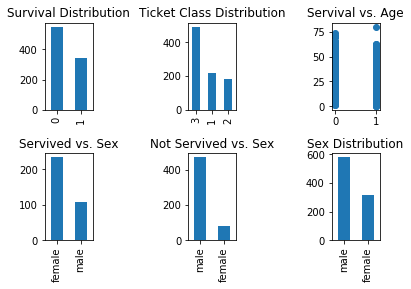

In [7]:
plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot.bar()
plt.title('Survival Distribution') 

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot.bar()
plt.title('Ticket Class Distribution')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.title('Servival vs. Age')

plt.subplot2grid((2,3),(1,0))
train[train.Survived==1].Sex.value_counts().plot.bar()
plt.title('Servived vs. Sex')

plt.subplot2grid((2,3),(1,1))
train[train.Survived==0].Sex.value_counts().plot.bar()
plt.title('Not Servived vs. Sex')

plt.subplot2grid((2,3),(1,2))
train.Sex.value_counts().plot.bar()
plt.title('Sex Distribution') 

# plt.subplot2grid((2,3),(1,2))
# train.Embarked.value_counts().plot.bar()

plt.subplots_adjust(wspace= 2, hspace=0.5)

In [8]:
sex_survived = train[train.Survived==1].Sex.value_counts().sort_index(ascending = False)
sex_Notsurvived = train[train.Survived==0].Sex.value_counts().sort_index(ascending = False)

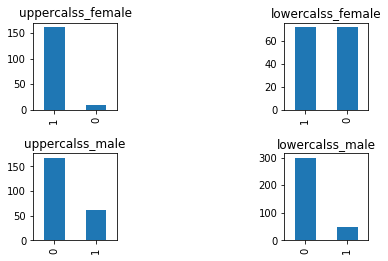

In [9]:
uppercalss_female = train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts()
plt.subplot2grid((2,2), (0,0))
uppercalss_female.plot.bar()
plt.title('uppercalss_female')

lowercalss_female = train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts()
plt.subplot2grid((2,2), (0,1))
lowercalss_female.plot.bar()
plt.title('lowercalss_female')

uppercalss_male = train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts()
plt.subplot2grid((2,2), (1,0))
uppercalss_male.plot.bar()
plt.title('uppercalss_male')

lowercalss_male = train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts()
plt.subplot2grid((2,2), (1,1))
lowercalss_male.plot.bar()
plt.title('lowercalss_male')

plt.subplots_adjust(wspace= 2, hspace=0.5)

# result here: 
# female had better survival % than men! upper class tickets had a higher % than lower ticket class.
# Female upper class have the highest % survival

In [10]:
# logistic regression formula, both categorial and variables
linear_formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)' 
result = {}

y,x = dmatrices(linear_formula, data=train, return_type='dataframe')

# Output from scikit-learn
model = LogisticRegression(fit_intercept = False, C=1e9)
res = model.fit(x, y)
model.coef_

C:\Users\soufi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\soufi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 6.3353018 , -1.03082343, -2.29145336, -2.71573077, -2.07257554,
        -2.15340818, -2.5483696 , -0.0391832 , -0.30712424, -0.06693672]])

In [11]:
# Output from statmodel
model = sm.Logit(y,x)
res_logit = model.fit()
result = [res_logit, linear_formula]
res_logit.summary()

         Current function value: 0.440723
         Iterations: 35


C:\Users\soufi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Mar 2020   Pseudo R-squ.:                  0.3382
Time:                        14:41:17   Log-Likelihood:                -392.68
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.282e-81
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.0610   1274.906      0.013      0.989   -2481.710    2515.832
C(Pclass)[T.2]      -1.0308      0.270     -3.821      0.000      -1.560      -0.502
C(Pclass)[T.3]      -2.2915      0.255     -9.004      0.000      -2.790      -1.793
C(Sex)[T.male]      -2.7157      0.201    -13.518      0.000      -3.109      -2.322
C(Embarked)[T.C]   -12.7982   1274.906     -0.010      0.992   -2511.569    2485.972
C(Embarked)[T.Q]   -12.8790   1274.906     -0.010      0.992   -2511.650    2485.892
C(Embarked)[T.S]   -13.2740   1274.906     -0.010      0.992   -2512.045    2485.497
Age                 -0.0392      0.008     -4.990      0.000      -0.055      -0.024
SibSp               -0.3071      0.108     -2.845      0.004      -0.519      -0.096
Parch               -0.0669      0.116     -0.577      0.564      -0.294       0.160
====================================================================================
"""

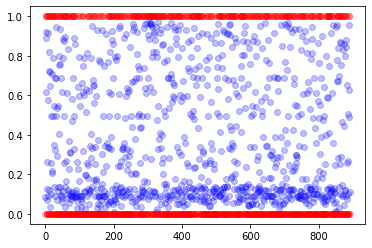

In [12]:
ypred = res_logit.predict(x)
# plt.plot(x.index, ypred
plt.plot(x.index, ypred, 'bo', x.index, y, 'ro', alpha=.25);

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test['Survived'] = -1

In [15]:
test.isnull().sum()
test = test.drop(['Cabin'], axis=1)
test = test.fillna(test.Age.median(), limit=86)

In [ ]:
# Use your model to make prediction on our test set. 
compared_resuts = ka.predict(test, result)
compared_resuts = Series(compared_resuts)  # convert our model to a series for easy output

0      -2.177524
1      -0.653828
2      -1.994775
3      -2.278518
4       0.259130
         ...    
413    -2.278518
414    15.532318
415    -2.729270
416    -2.278518
417    10.621405
Length: 418, dtype: float64

In [ ]:
compared_resuts.to_csv("data/output/logitregres.csv")